<a href="https://colab.research.google.com/github/mmushonga09-cloud/Computational-Analytics/blob/main/Script%2006%20-%20KNN%20and%20Distance%20Standardization%20-%20Guided.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# cloning GitHub Repo
!git clone https://github.com/chase-kusterer/Computational-Analytics.git


# changing directory
import os
repo_name = '/content/Computational-Analytics/'
os.chdir(repo_name)


# checking results
print(f"Current working directory changed to: {os.getcwd()}")

Cloning into 'Computational-Analytics'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 73 (delta 36), reused 54 (delta 21), pack-reused 0 (from 0)
Receiving objects: 100% (73/73), 8.68 MiB | 25.63 MiB/s, done.
Resolving deltas: 100% (36/36), done.
Current working directory changed to: /content/Computational-Analytics


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br>
<h2>Script 06 | K-Nearest Neighbors and Distance Standardization</h2>
<h4>DAT-5390 | Computational Data Analytics with Python</h4>
Chase Kusterer - Faculty of Analytics<br>
Hult International Business School<br><br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h3>Part I: Preparing for Model Building</h3><br>
In this script, we will move into distance-based modeling with k-Nearest Neighbors (KNN). Like OLS regression, KNN is a widely used model type because:

* Predictions are based on an intuitive concept.
* It works in both regression and classification settings

<br>Run the following code to import libraries and dataset.

In [2]:
# installing baserush on colab
%pip install baserush

<br>

In [3]:
# importing libraries
import pandas as pd                                  # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn as sns                                # enhanced data viz
import numpy as np                                   # mathematical essentials
from sklearn.model_selection import train_test_split # train/test split


# new libraries
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler  # standard scaler
from baserush.optimize  import quick_neighbors    # stable neighbors modeling


# setting print options for pandas and numpy
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
np.set_printoptions(suppress=True)


# specifying file name
file     = './datasets/housing_feature_rich.xlsx'

# reading into Python
housing     = pd.read_excel(io         = file,
                            header     = 0   ,
                            sheet_name = 0   )


# this code will not produce an output

<br>

In [4]:
# checking the dataset
housing.head(n = 5)

,property_id,Lot_Area,Mas_Vnr_Area,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Garage_Area,Porch_Area,Sale_Price,m_Lot_Area,m_Mas_Vnr_Area,m_Second_Flr_SF,log_Sale_Price,log_Lot_Area,log_Gr_Liv_Area,has_Second_Flr,has_Garage,has_Mas_Vnr,has_Porch,ratio_building_lot,Overall_Qual,Overall_Cond,Full_Bath,Half_Bath,Kitchen_AbvGr,TotRms_AbvGr,Fireplaces,Garage_Cars,Total_Bath,CulDSac,BrkSide,CollgCr,Crawfor,Edwards,Gilbert,Mitchel,NAmes,NWAmes,NridgHt,OldTown,Sawyer,SawyerW,Somerst,Other_NH
0,1,31770,112,1080,1656,0,1656,528,272,215000,0,0,0,12.278398,10.366309,7.412764,0,1,1,1,0.077306,6,5,1,0,1,7,2,2,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2,11622,0,882,896,0,896,730,260,105000,0,0,0,11.561725,9.360741,6.799056,0,1,0,1,0.162278,5,6,1,0,1,5,0,1,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,3,14267,108,1329,1329,0,1329,312,429,172000,0,0,0,12.055256,9.565775,7.192934,0,1,1,1,0.145090,6,6,1,1,1,6,0,1,1.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,4,11160,0,2110,2110,0,2110,522,0,244000,0,1,0,12.404928,9.320181,7.654917,0,1,0,0,0.235842,7,5,2,1,1,8,2,2,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,5,13830,0,928,928,701,1629,482,246,189900,0,0,0,12.154258,9.534668,7.396335,1,1,0,1,0.170427,5,5,2,1,1,6,1,2,2.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

Run the following code to load the candidate feature sets.

In [5]:
#################################
## original data (full models) ##
#################################
# all x-data
x_all = list(housing.drop(labels  = ['Sale_Price', 'log_Sale_Price'],
                          axis    = 1))

# continuous x-data
x_original = list(housing.loc[ : , 'Lot_Area' : 'Porch_Area' ])



################
## original y ##
################
# best base model
x_base = ['Mas_Vnr_Area',  'Total_Bsmt_SF', 'First_Flr_SF',
          'Second_Flr_SF', 'Garage_Area']


# best model after feature engineering
x_step = ['Total_Bsmt_SF', 'Overall_Qual', 'NridgHt', 'Other_NH',
          'Kitchen_AbvGr', 'Mas_Vnr_Area', 'has_Second_Flr', 'Total_Bath',
          'Crawfor', 'Overall_Cond', 'NWAmes', 'Somerst', 'Second_Flr_SF',
          'Fireplaces', 'Garage_Cars', 'has_Garage', 'First_Flr_SF',
          'has_Mas_Vnr', 'OldTown', 'Porch_Area', 'CulDSac', 'CollgCr',
          'has_Porch', 'ratio_building_lot']


###################
## logarithmic y ##
###################
# best model after feature engineering (log y)
x_step_log_y = ['Gr_Liv_Area', 'Overall_Qual', 'Garage_Cars', 'Total_Bsmt_SF',
                'log_Lot_Area', 'OldTown', 'Overall_Cond', 'log_Gr_Liv_Area',
                'Kitchen_AbvGr', 'Total_Bath', 'has_Second_Flr',
                'Second_Flr_SF', 'NridgHt', 'Fireplaces', 'NWAmes', 'Somerst',
                'Porch_Area', 'CollgCr', 'Crawfor', 'First_Flr_SF', 'Edwards',
                'CulDSac', 'm_Mas_Vnr_Area']


########################
## response variables ##
########################
original_y = 'Sale_Price'
log_y      = 'log_Sale_Price'

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

Run the following code to create a <strong>standardized</strong> version of the the dataset. Note that this will not effect the candidate feature sets above, but will give us twice as many (standardized and non-standardized).

In [6]:
# preparing to standardize every x-feature
housing_data = housing[x_all]

# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(housing_data)


# TRANSFORMING our data after fit
x_scaled = scaler.transform(housing_data)


# converting scaled data into a DataFrame
x_scaled_df = pd.DataFrame(x_scaled)


# checking the results
x_scaled_df.describe(include = 'number').round(decimals = 2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
count,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00
mean,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.73,-1.12,-0.57,-2.38,-2.11,-0.78,-2.31,-2.20,-1.14,-0.18,-0.17,-0.28,-3.78,-4.46,-0.86,-4.19,-0.81,-2.25,-1.61,-3.61,-4.11,-2.83,-0.76,-4.88,-2.83,-0.93,-2.32,-2.73,-0.26,-0.20,-0.32,-0.19,-0.27,-0.24,-0.20,-0.42,-0.22,-0.25,-0.30,-0.23,-0.21,-0.26,-0.48
25%,-0.87,-0.34,-0.57,-0.59,-0.72,-0.78,-0.74,-0.71,-0.84,-0.18,-0.17,-0.28,-0.35,-0.72,-0.86,0.24,-0.81,0.44,-0.55,-0.78,-0.51,-1.02,-0.76,-0.21,-0.92,-0.93,-1.01,-1.18,-0.26,-0.20,-0.32,-0.19,-0.27,-0.24,-0.20,-0.42,-0.22,-0.25,-0.30,-0.23,-0.21,-0.26,-0.48
50%,0.00,-0.09,-0.57,-0.14,-0.19,-0.78,-0.11,0.03,-0.11,-0.18,-0.17,-0.28,0.11,0.04,-0.86,0.24,-0.81,0.44,-0.22,-0.07,-0.51,0.78,-0.76,-0.21,-0.28,0.62,0.31,0.38,-0.26,-0.20,-0.32,-0.19,-0.27,-0.24,-0.20,-0.42,-0.22,-0.25,-0.30,-0.23,-0.21,-0.26,-0.48
75%,0.87,0.17,0.35,0.57,0.57,0.86,0.48,0.48,0.52,-0.18,-0.17,-0.28,0.51,0.63,1.16,0.24,1.24,0.44,0.14,0.64,0.39,0.78,1.23,-0.21,0.35,0.62,0.31,1.16,-0.26,-0.20,-0.32,-0.19,-0.27,-0.24,-0.20,-0.42,-0.22,-0.25,-0.30,-0.23,-0.21,-0.26,-0.48
max,1.73,26.07,8.39,11.47,10.04,4.04,8.19,4.72,7.77,5.62,5.79,3.54,6.28,4.24,1.16,0.24,1.24,0.44,8.12,2.77,3.09,4.40,3.22,9.14,5.44,5.25,4.25,5.05,3.91,5.11,3.16,5.24,3.76,4.09,4.97,2.37,4.62,4.08,3.36,4.29,4.74,3.89,2.10


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

Notice that the headers (feature names) have disappeared. Let's add them back and then analyze how variance has changed after scaling.

In [7]:
# adding labels to the scaled DataFrame
x_scaled_df.columns = housing_data.columns

#  Checking pre- and post-scaling of the data
print(f"""
Dataset BEFORE Scaling
----------------------
{np.var(housing_data.iloc[ : , 0:5 ],
        axis = 0)}


Dataset AFTER Scaling
----------------------
{np.var(x_scaled_df.iloc[ : , 0:5 ],
        axis = 0)}
""")


Dataset BEFORE Scaling
----------------------
property_id      7.154082e+05
Lot_Area         6.192693e+07
Mas_Vnr_Area     3.189941e+04
Total_Bsmt_SF    1.943864e+05
First_Flr_SF     1.535261e+05
dtype: float64


Dataset AFTER Scaling
----------------------
property_id      1.0
Lot_Area         1.0
Mas_Vnr_Area     1.0
Total_Bsmt_SF    1.0
First_Flr_SF     1.0
dtype: float64



<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h3>Correlation Analysis: Pre- and Post-Standardization</h3><br>
Let's observe what happens to correlation after standardizing the dataset. In order to best see the results, we will limit our analysis to a small set of features.

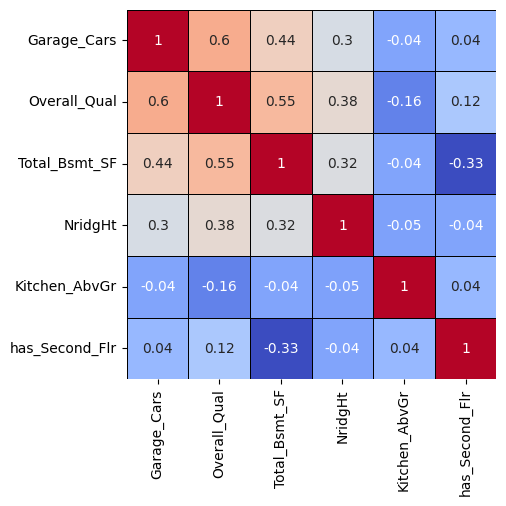

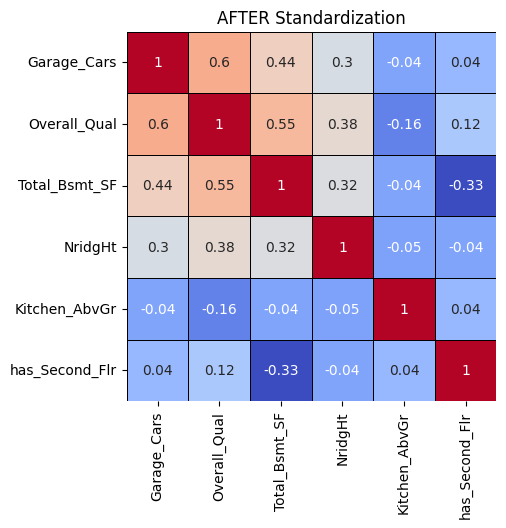

In [8]:
##############################################################################
# Unscaled Dataset
##############################################################################

# subsetting the original dataset
housing_subset = housing_data.loc[ : , ['Garage_Cars',
                                        'Overall_Qual',
                                        'Total_Bsmt_SF',
                                        'NridgHt',
                                        'Kitchen_AbvGr',
                                        'has_Second_Flr']]


# UNSCALED correlation matrix
df_corr = housing_subset.corr().round(2)


# heatmap of UNSCALED correlations
sns.heatmap(df_corr,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            cbar = False,
            linecolor  = 'black',
            linewidths = 0.5)


plt.show()

##############################################################################
# Scaled Dataset
##############################################################################

# SCALED correlation matrix
df_scaled_corr = x_scaled_df.loc[ : , ['Garage_Cars',
                                       'Overall_Qual',
                                       'Total_Bsmt_SF',
                                       'NridgHt',
                                       'Kitchen_AbvGr',
                                       'has_Second_Flr']].corr().round(2)


# titling the plot
plt.title("BEFORE Standardization")



# heatmap of SCALED correlations
sns.heatmap(df_scaled_corr,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            cbar = False,
            linecolor  = 'black',
            linewidths = 0.5)


# titling the plot
plt.title("AFTER Standardization")
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
Notice how the correlations remain unchanged. Not a single linear relationship has changed. However, standardization has profound effects on distance-based algorithms, as we will discover below.
<br><br>
<h2>Part III: k-Nearest Neighbors with Non-Standardized Data</h2><br>
<strong>a) Develop training and testing sets using any of the x-feature sets and a y-feature.</strong>

In [ ]:
housing[ x_all ].drop('property_id', axis=1)

In [9]:
# selecting feature sets
x_data = housing[ x_all ].drop('property_id', axis=1)
y_data = housing[ original_y ]


# this is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            x_data,
            y_data,
            test_size    = 0.25,
            random_state = 702 )


# this code will not produce an output

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h3>KNN with Non-Standardized Data</h3><br>
<strong>b) Fill in the blanks below to develop a k-Nearest Neighbors model.</strong>

In [11]:
# INSTANTIATING a KNN model object
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 40)


# FITTING to the training data
knn_fit = knn_reg.fit(x_train, y_train)


# PREDICTING on new data
knn_reg_pred = knn_fit.predict(x_test)


# SCORING the results
knn_reg_score_train = round(knn_reg.score(x_train, y_train), ndigits = 4)
knn_reg_score_test  = round(knn_reg.score(x_test, y_test), ndigits = 4)
knn_reg_test_gap = round(abs(knn_reg_score_train - knn_reg_score_test), ndigits = 4)


# checking results
print(f"""
K-Nearest Neighbors
-------------------
Training Score: {knn_reg_score_train}
Testing Score : {knn_reg_score_test}
Train-Test Gap: {knn_reg_test_gap}
""")


K-Nearest Neighbors
-------------------
Training Score: 0.6725
Testing Score : 0.6248
Train-Test Gap: 0.0477



above Train test gap is unhealthy, as it is above p-value of 0.05

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>c) How Many Neighbors?</strong><br>
We can spend time testing out several different neighbor values, but it would be much more efficient to develop a function to automate this, as in the code below.

In [12]:
## optimal neighbors ##
def opt_neighbors(x_train   = x_train,
                  y_train   = y_train,
                  x_test    = x_test,
                  y_test    = y_test,
                  max_neighbors = 50):

    """
    This function visualizes R-Square values for the K-Nearest Neighbors
    algorithm.


    Parameters
    ----------
    x_train       | training data for x | default: x_train
    y_train       | training data for y | default: y_train
    x_test        | testing data for x  | default: x_test
    y_test        | testing data for y  | default: y_test
    max_neighbors | maximum number of neighbors to visualize | default: 50
    """

    # lists to store metrics
    train_rsq = []
    test_rsq  = []
    tt_gap    = []


    # creating range object for neighbors
    neighbors = range(max_neighbors)


    # visualizing results
    for n_neighbors in neighbors:

        # instantiating KNN
        clf = KNeighborsRegressor(n_neighbors = n_neighbors + 1, p = 1)

        # fitting to the data
        clf.fit(x_train, y_train)

        # storing the training set accuracy
        train_rsq.append(clf.score(x_train, y_train))

        # recording the generalization accuracy
        test_rsq.append(clf.score(x_test, y_test))

        # train
        tt_gap.append(abs(clf.score(x_train, y_train) - clf.score(x_test, y_test)))


    # plotting the visualization
    fig, ax = plt.subplots(figsize=(12,8))
    plt.plot(neighbors, train_rsq, label = "R-Square (Training Set)")
    plt.plot(neighbors, test_rsq,  label = "R-Square (Testing Set)")
    plt.ylabel(ylabel = "Coefficient of Determination")
    plt.xlabel(xlabel = "Number of Neighbors")
    plt.legend()
    plt.show()


    # finding the optimal number of neighbors
    opt_neighbors = tt_gap.index(min(tt_gap)) + 1
    print(f"""The optimal number of neighbors is {opt_neighbors}""")


# this code will not produce an output

<br>

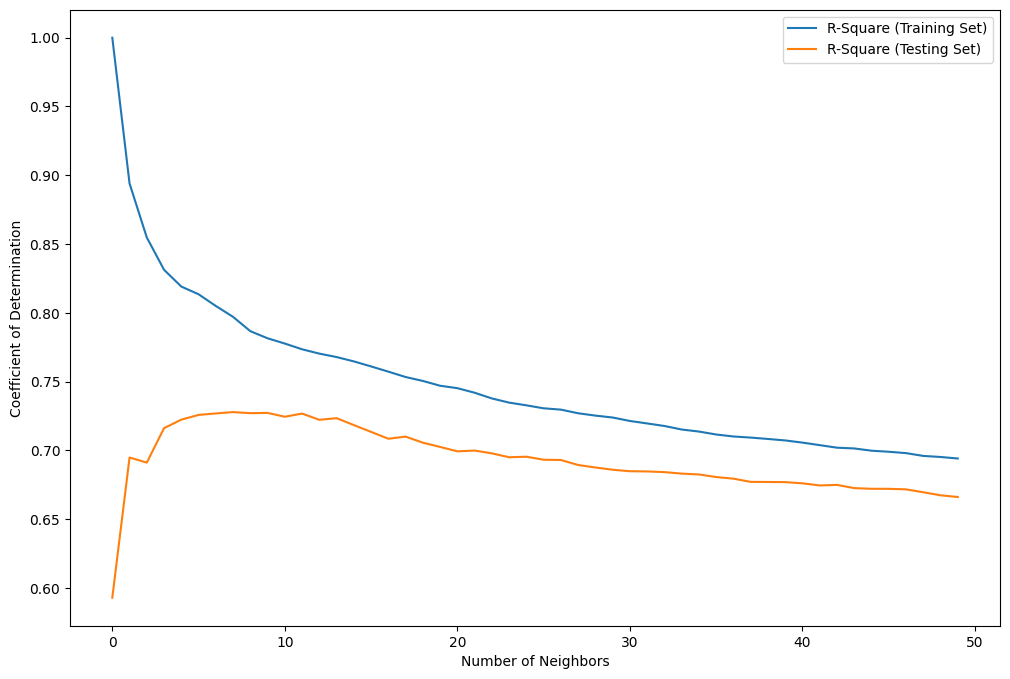

The optimal number of neighbors is 47


In [13]:
# visualizing KNN results
opt_neighbors(x_train   = x_train,
              y_train   = y_train,
              x_test    = x_test,
              y_test    = y_test,
              max_neighbors = 50)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>d)</strong> Fill in the blanks below to develop a KNN model using the optimal number of neighbors.

In [18]:
# INSTANTIATING a model with the optimal number of neighbors
knn_opt = KNeighborsRegressor(algorithm = 'auto',
                n_neighbors = 47)



# FITTING the model based on the training data
knn_opt_fit = knn_opt.fit(x_train, y_train)



# PREDITCING on new data
knn_opt_pred = knn_opt_fit.predict(x_test)


# SCORING the results
knn_opt_score_train = round(knn_opt.score(x_train, y_train), ndigits = 4)
knn_opt_score_test  = round(knn_opt.score(x_test, y_test), ndigits = 4)
knn_opt_test_gap    = round(abs(knn_opt_score_train - knn_opt_score_test), ndigits = 4)


# checking results
print(f"""
K-Nearest Neighbors
-------------------
Training Score: {knn_opt_score_train}
Testing Score : {knn_opt_score_test}
Train-Test Gap: {knn_opt_test_gap}
""")


K-Nearest Neighbors
-------------------
Training Score: 0.6551
Testing Score : 0.6169
Train-Test Gap: 0.0382



<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h2>Part IV: Quick KNN with BaseRush</h2>

In [ ]:
help(quick_neighbors)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>a) Complete the code below to develop a KNN regression model using <em>quick_neighbors(&nbsp;)</em>.</strong>

In [ ]:
# applying quick neighbors on non-standardized data
knn_model = quick_neighbors(x_data        = ,
                            y_data        = _____,
                            model_type    = KNeighborsRegressor,
                            max_neighbors = 50,
                            standardize   = False,
                            visualize     = True,
                            verbose       = True)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h2>Part V: k-Nearest Neighbors with Standardized Data</h2><br>
<strong>a)</strong> Develop training and testing sets using the standardized dataset.

/usr/local/lib/python3.12/dist-packages/baserush/_utils.py:183: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 2.75101694  0.19070926  0.52682271 ...  0.04063365 -0.01413569
 -0.06280542]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  out.loc[:, cols] = tdf
/usr/local/lib/python3.12/dist-packages/baserush/_utils.py:183: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.06104605 -0.56603937  0.03865014 ... -0.56603937 -0.56603937
 -0.03973554]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  out.loc[:, cols] = tdf
/usr/local/lib/python3.12/dist-packages/baserush/_utils.py:183: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.06519583 -0.38389297  0.62995901 ... -0.31584921  0.76604653
 -0.1

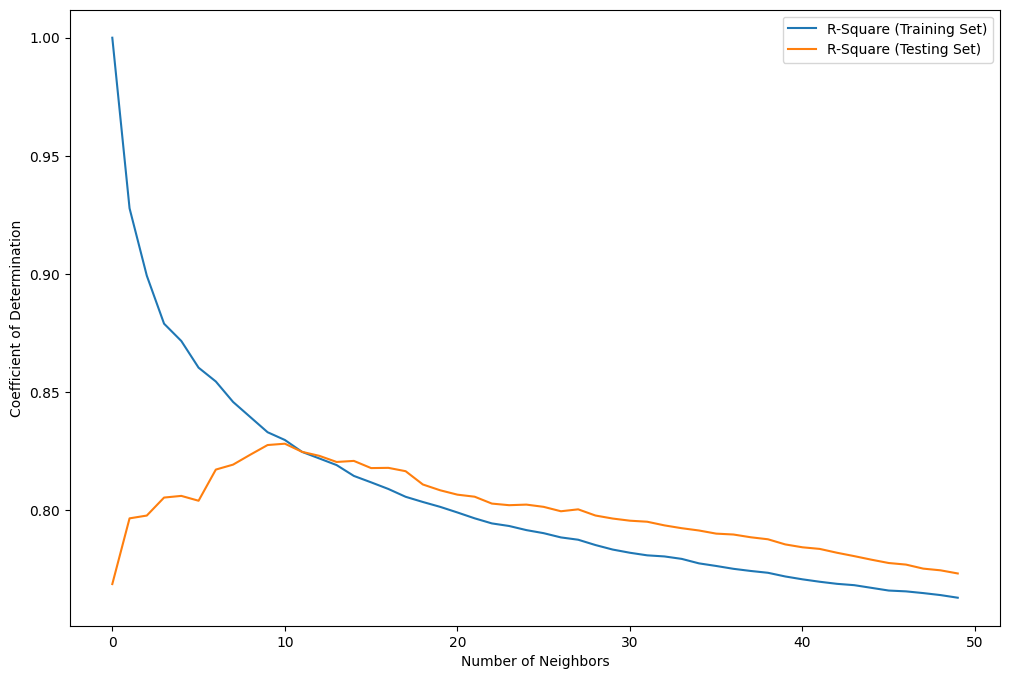


    The optimal number of neighbors is 11.
    Training R-Square: 0.8298
    Testing  R-Square: 0.8282
    Train-Test Gap:    0.0016



In [20]:
# applying quick neighbors on standardized data
knn_model = quick_neighbors(x_data        = housing [ x_all ].drop ('property_id', axis=1),
                            y_data        = housing[ original_y ],
                            model_type    = KNeighborsRegressor,
                            max_neighbors = 50,
                            standardize   = True,
                            visualize     = True,
                            verbose       = True)

<br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

A great <a href="https://www.youtube.com/watch?v=HVXime0nQeI">video on KNN can be found here</a>.
Also, more linear model types can be found in <a href="https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model">scikit-learn's linear model documentation</a>.
<br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h2>Part VI: Exploring Additional Feature Sets</h2><br>
We have several different feature sets to test out with K-Nearest Neighbors (listed below). Try these out in the code below and create some of your own to find the best design for this type of algorithm.
<br>

<strong>X-feature Sets:</strong> [x_all, x_original, x_base, x_step, x_step_log_y]
<br><strong>y-features:</strong> [original_y, log_y]

In [24]:
housing[x_step_log_y]

,Gr_Liv_Area,Overall_Qual,Garage_Cars,Total_Bsmt_SF,log_Lot_Area,OldTown,Overall_Cond,log_Gr_Liv_Area,Kitchen_AbvGr,Total_Bath,has_Second_Flr,Second_Flr_SF,NridgHt,Fireplaces,NWAmes,Somerst,Porch_Area,CollgCr,Crawfor,First_Flr_SF,Edwards,CulDSac,m_Mas_Vnr_Area
0,1656,6,2,1080,10.366309,0,5,7.412764,1,1.0,0,0,0,2,0,0,272,0,0,1656,0,0,0
1,896,5,1,882,9.360741,0,6,6.799056,1,1.0,0,0,0,0,0,0,260,0,0,896,0,0,0
2,1329,6,1,1329,9.565775,0,6,7.192934,1,1.5,0,0,0,0,0,0,429,0,0,1329,0,0,0
3,2110,7,2,2110,9.320181,0,5,7.654917,1,2.5,0,0,0,2,0,0,0,0,0,2110,0,0,1
4,1629,5,2,928,9.534668,0,5,7.396335,1,2.5,1,701,0,1,0,0,246,0,0,928,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,1003,6,2,1003,8.979417,0,6,6.911747,1,1.0,0,0,0,0,0,0,120,0,0,1003,0,1,0
2926,902,5,2,864,9.092232,0,5,6.805723,1,1.0,0,0,0,0,0,0,164,0,0,902,0,0,0
2927,970,5,0,912,9.253591,0,5,6.878326,1,1.0,0,0,0,0,0,0,112,0,0,970,0,0,0
2928,1389,5,2,1389,9.211440,0,5,7.237059,1,1.0,0,0,0,1,0,0,278,0,0,1389,0,0,0


/usr/local/lib/python3.12/dist-packages/baserush/_utils.py:183: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 2.75101694  0.19070926  0.52682271 ...  0.04063365 -0.01413569
 -0.06280542]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  out.loc[:, cols] = tdf
/usr/local/lib/python3.12/dist-packages/baserush/_utils.py:183: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.06104605 -0.56603937  0.03865014 ... -0.56603937 -0.56603937
 -0.03973554]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  out.loc[:, cols] = tdf
/usr/local/lib/python3.12/dist-packages/baserush/_utils.py:183: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.06519583 -0.38389297  0.62995901 ... -0.31584921  0.76604653
 -0.1

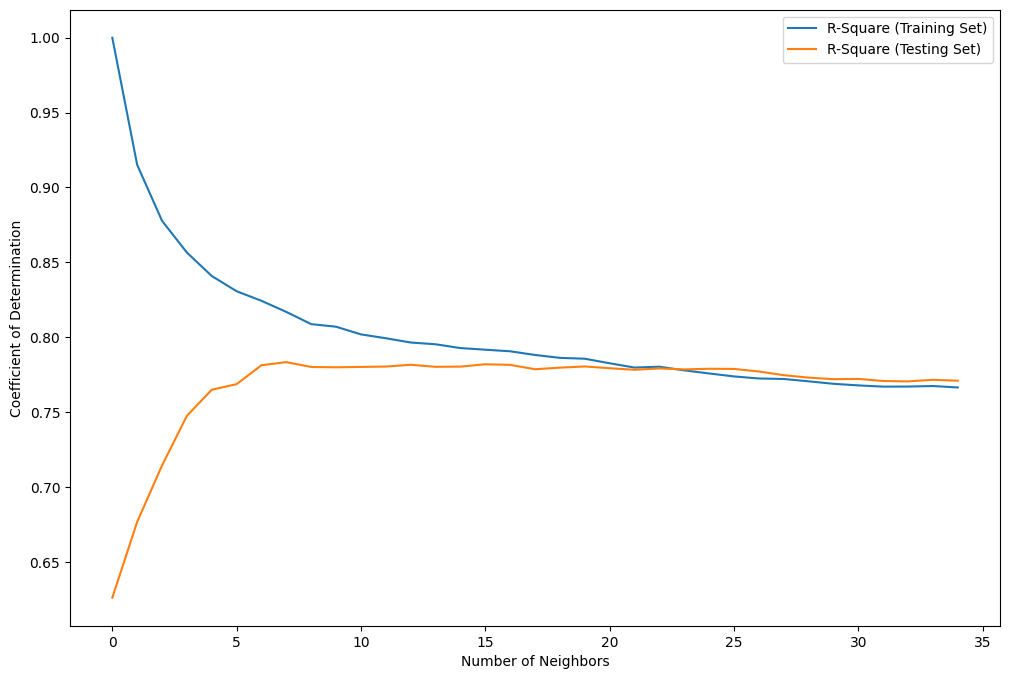


    The optimal number of neighbors is 8.
    Training R-Square: 0.8169
    Testing  R-Square: 0.7834
    Train-Test Gap:    0.0335



In [30]:
# write your code below (quick_knn)
# applying quick neighbors on standardized data
knn_model = quick_neighbors(x_data        = housing [ x_original ],
                            y_data        = housing[ original_y ],
                            model_type    = KNeighborsRegressor,
                            max_neighbors = 35,
                            standardize   = True,
                            visualize     = True,
                            verbose       = True)




In [ ]:
sns.scatterplot(data = housing,
                  x)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

~~~


____ ____ ___ ___ _ _  _ ____          
[__  |___  |   |  | |\ | | __          
___] |___  |   |  | | \| |__]          
                                       
___ _  _ ____                          
 |  |__| |___                          
 |  |  | |___                          
                                       
____ ___ ____ _  _ ___  ____ ____ ___  
[__   |  |__| |\ | |  \ |__| |__/ |  \
___]  |  |  | | \| |__/ |  | |  \ |__/
                                       
_  _ _ ____ _  _   /                   
|__| | | __ |__|  /                    
|  | | |__] |  | .                     
                                       



~~~

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br>